In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Indlæsning af DMI-data (data fra Ilulissat).

In [2]:
daily_Ilul = pd.read_excel('DailyMinMax_Ilullisat_Cor.xlsx')
Ilul = daily_Ilul.to_numpy()
time_Ilul = Ilul[:,0]
temp_Ilul = Ilul[:,1]
completeness_Ilul = Ilul[:,2]

Indlæsning af GRACE-data (satellit-data).

In [4]:
grace = pd.read_csv('GIS00_grace.dat', delimiter = ' ', header = None)
grace = grace.to_numpy()
år_grace = grace[:,0]
masseændring_grace = grace[:,1]
volumenændring_grace = masseændring_grace*10**12/917  # kg/m^3
error_grace = grace[:,2]

In [5]:
# Startbetingelser
V = 2.85 * 10**15         # m^3, begyndelsesvolumen
R_0 = 500 * 10**3         # m, afstand fra midten af iskappen til randen
h_0 = 3 * 10**3           # m, GrIS-højde i dag
T_f = 0                   # deg C, vands frysepunkt
alfa = - 9.8 * 10**(-3)   # temperaturændring pr. højdeforøgelse (deg C/m)
k_h = h_0/np.sqrt(R_0)    # antager, k_h er konstant (dvs. iskappens form ikke ændrer sig)
dt = 1/(365.25*2)         # år

k_melt = 5.5                # Smeltekonstant, der skal tunes
acc = 0.2                 # m/år, antaget konstant akkumulation (højdeændring)
k_acc = 642/(305.1*0.917)         # akkumulationskonstant

Gennemsnitlig årlig nedbør (mio. m^3): 701.3308028586081


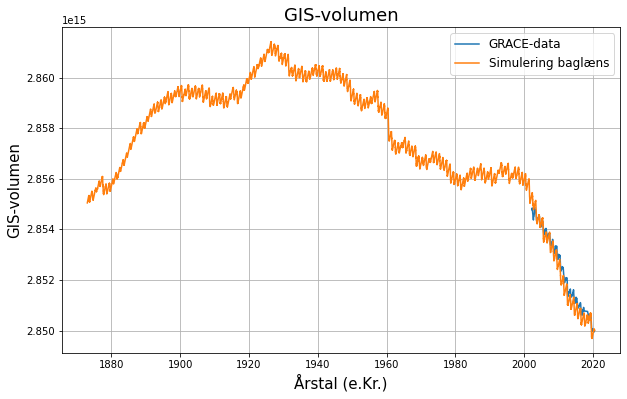

In [7]:
V = 2.85 * 10**15
år_grace_flip = np.flip(år_grace)
masseændring_grace_flip = np.flip(masseændring_grace)
volumenændring_grace_flip = np.flip(volumenændring_grace)
time_Ilul_flip = np.flip(time_Ilul[time_Ilul<=2020.5])
temp_Ilul_flip = np.flip(temp_Ilul[time_Ilul<=2020.5])

v_list_b = []
v_meltlist_b = []
v_acclist_b = []

for i in range(len(time_Ilul_flip)):
    R = (3/16 * V/k_h)**(2/5)
    if temp_Ilul_flip[i] - T_f <= 0:
        v_melt = 0
    else:
        v_melt =  k_melt * 8/3 * R * (temp_Ilul_flip[i]-T_f)**3/(alfa * k_h)**2 * dt
    v_acc = k_acc * acc * 8 * R**2 * dt # Nedbør på GrIS pr. halve døgn
    V += - v_acc + v_melt
    
    v_meltlist_b.append(v_melt)
    v_acclist_b.append(v_acc)
    v_list_b.append(V)

    
print('Gennemsnitlig årlig nedbør (mio. m^3):', np.sum(v_acclist_b)*10**(-9)/(time_Ilul_flip[0]-time_Ilul_flip[-1]))
plt.figure(figsize = (10,6))
plt.plot(år_grace_flip, volumenændring_grace_flip + 2.85*10**15 - volumenændring_grace_flip[0], label = 'GRACE-data')
plt.plot(time_Ilul_flip, v_list_b, label = 'Simulering baglæns')
#plt.xlim(2000,2022)
#plt.ylim(2.847*10**15, 2.856*10**15)
#plt.xlim(1870,1980)
#plt.ylim(2.856*10**15, 2.864*10**15)
plt.xlabel('Årstal (e.Kr.)', fontsize = 15)
plt.ylabel('GIS-volumen', fontsize = 15)
plt.title('GIS-volumen', fontsize = 18)
plt.grid()
plt.legend(fontsize = 12)
#plt.savefig(f'GIS_k_melt={k_melt}_k_acc={k_acc}.jpg', dpi = 300)
plt.show()